In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import random
from model.RadixSpline import *
from model.RS_Meta import *
import time

In [2]:
datafile = open('./data/lognormal.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)
gaps = np.diff(data)

100%|██████████| 18500001/18500001 [00:14<00:00, 1273789.10it/s]


In [3]:
epsilon_list = list(range(25,400,25))
RS_Index_seg_num = []
RS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    RS_Index = RadixSpline(epsilon)
    RS_Index.learn_index(data)
    RS_Index_seg_num.append(RS_Index.seg_num)
    RS_Index_mae.append(RS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 22113/18500001 [00:00<01:23, 221124.94it/s]

25 12973 9.70023709728448


  0%|          | 10639/18500001 [00:00<02:53, 106386.80it/s]

50 3397 19.72092406913924


  0%|          | 40666/18500001 [00:00<00:45, 406653.60it/s]

75 1538 29.49780889201033


  0%|          | 21670/18500001 [00:00<01:25, 216692.97it/s]

100 893 39.91419692355692


  0%|          | 21497/18500001 [00:00<01:25, 214965.08it/s]

125 578 50.40421251869122


100%|██████████| 18500001/18500001 [01:02<00:00, 297746.90it/s]


150 406 60.388841060062646


100%|██████████| 18500001/18500001 [01:00<00:00, 303577.50it/s]


175 307 70.18831290873985


  0%|          | 21492/18500001 [00:00<01:25, 214912.01it/s]

200 238 80.01168172909829


  0%|          | 40336/18500001 [00:00<00:45, 403359.42it/s]

225 189 90.16026620755318


  0%|          | 0/18500001 [00:00<?, ?it/s]

250 145 102.7592130940966


  0%|          | 31662/18500001 [00:00<00:58, 316609.73it/s]

275 123 113.40295046470538


100%|██████████| 18500001/18500001 [01:00<00:00, 306158.37it/s]


300 115 121.80118692966558


  0%|          | 10596/18500001 [00:00<02:54, 105958.59it/s]

325 98 132.63236531716944


  0%|          | 21149/18500001 [00:00<01:27, 211481.63it/s]

350 89 139.38850214116204


100%|██████████| 18500001/18500001 [01:01<00:00, 301832.58it/s]


375 82 151.83450044137837


-60.259366777787605

In [4]:
#epsilon_list = list(range(25,400,25))
RS_Meta_Index_seg_num_withBound = []
RS_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    RS_Meta_Index = RS_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    RS_Meta_Index.learn_index_lookahead(data)
    RS_Meta_Index_seg_num_withBound.append(RS_Meta_Index.seg_num)
    RS_Meta_Index_mae_withBound.append(RS_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [00:52<00:00, 354155.63it/s]


25 9650 9.742046716646124


100%|██████████| 18500001/18500001 [00:52<00:00, 353858.08it/s]


50 2256 20.943158813883308


100%|██████████| 18500001/18500001 [00:51<00:00, 358940.35it/s]


75 953 32.14316312739659


100%|██████████| 18500001/18500001 [00:52<00:00, 355277.24it/s]


100 524 43.27786322822361


100%|██████████| 18500001/18500001 [00:53<00:00, 345513.45it/s]


125 332 54.98090843346441


100%|██████████| 18500001/18500001 [00:53<00:00, 343582.43it/s]


150 226 66.52288602578994


100%|██████████| 18500001/18500001 [00:53<00:00, 343431.38it/s]


175 162 77.25797333740685


100%|██████████| 18500001/18500001 [00:55<00:00, 335477.24it/s]


200 131 92.89229308690308


100%|██████████| 18500001/18500001 [00:51<00:00, 356670.61it/s]


225 103 102.74760287850795


100%|██████████| 18500001/18500001 [00:51<00:00, 358571.30it/s]


250 84 118.63583742508987


100%|██████████| 18500001/18500001 [00:51<00:00, 355959.04it/s]


275 75 134.27461074191294


100%|██████████| 18500001/18500001 [00:50<00:00, 363852.64it/s]


300 63 149.75737752662823


100%|██████████| 18500001/18500001 [00:50<00:00, 364178.66it/s]


325 56 164.34547792727147


100%|██████████| 18500001/18500001 [00:51<00:00, 360608.95it/s]


350 50 178.34285754903473


100%|██████████| 18500001/18500001 [00:50<00:00, 368268.96it/s]


375 48 194.74719493258405


-58.06613617911935

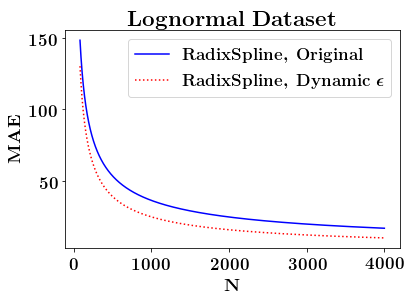

In [7]:
x = np.arange(80,4000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Lognormal~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,RS_Index_seg_num,RS_Index_mae)
p2,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound[:],RS_Meta_Index_mae_withBound[:])
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,RS_Meta_Index_seg_num_withBound,RS_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{RadixSpline,~Original}$')
#plt.scatter(RS_Index_seg_num[1:], RS_Index_mae[1:],c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{RadixSpline,~Dynamic~\epsilon}$')
#plt.scatter(RS_Meta_Index_seg_num_withBound[1:-3], RS_Meta_Index_mae_withBound[1:-3],c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/RadixSpline/Lognormal_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [6]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(124147.69927560349, 85269.58318981707, 0.31316018188527506)